In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("movies_2026.csv", encoding="latin-1")
print(df.shape)
df.head()

(19883, 28)


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,1627085,0.0,Drama|Crime,NaN,NaN,NaN,NaN,0.0,95,False,...,2026-02-01,0.0,0,2,0,0,8,2.0,5.0,2026.0
1,1626914,0.0,Animation,NaN,NaN,NaN,NaN,0.0,3,False,...,2026-02-01,0.0,0,1,0,0,4,0.0,0.0,2026.0
2,1626898,0.0,Animation,NaN,NaN,NaN,NaN,0.0,2,False,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0
3,1626808,0.0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0.0,5,False,...,2026-02-01,0.0,0,3,0,0,7,0.0,0.0,2026.0
4,1626678,0.0,Animation,NaN,NaN,NaN,NaN,0.0,12,False,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 19883 entries, 0 to 19882
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19883 non-null  int64  
 1   budget                     19883 non-null  float64
 2   genres                     17918 non-null  str    
 3   homePage                   5607 non-null   str    
 4   productionCompany          14223 non-null  str    
 5   productionCompanyCountry   11473 non-null  str    
 6   productionCountry          16009 non-null  str    
 7   revenue                    19883 non-null  float64
 8   runtime                    19883 non-null  int64  
 9   video                      19397 non-null  object 
 10  director                   18907 non-null  str    
 11  actors                     17282 non-null  str    
 12  actorsPopularity           17275 non-null  str    
 13  actorsCharacter            17048 non-null  str    
 14  o

In [4]:
df.describe()

,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
count,1.988300e+04,1.988300e+04,1.988300e+04,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19846.000000,19721.000000,19881.000000
mean,9.022402e+05,9.413280e+06,2.879213e+07,66.093799,26.248842,3.837069,675.927325,1.949253,1.972539,1.230247,1082.049640,3516.505996,8224.352061,2016.827222
std,6.848978e+05,2.774781e+07,1.109805e+08,50.089055,156.067177,3.397705,1938.194656,1.256225,2.312075,2.244688,26402.818732,47768.661984,71257.943156,12.838005
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1902.000000
25%,1.462195e+05,0.000000e+00,0.000000e+00,10.000000,0.054600,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2013.000000
50%,8.696230e+05,0.000000e+00,0.000000e+00,86.000000,8.502000,5.400000,6.000000,2.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2021.000000
75%,1.589602e+06,1.000000e+06,3.306335e+05,103.000000,22.239000,6.800000,423.000000,3.000000,3.000000,1.000000,21.000000,6.000000,12.000000,2025.000000
max,1.627166e+06,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000,922162.000000,922017.000000,2026.000000


In [5]:
numeric_vars = ['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 
                'voteCount', 'genresAmount', 'productionCoAmount', 
                'productionCountriesAmount', 'actorsAmount', 
                'castWomenAmount', 'castMenAmount', 'releaseYear']

df_cluster = df[numeric_vars].copy()
print(df_cluster.isnull().sum())
print(f"\nShape: {df_cluster.shape}")

budget                         0
revenue                        0
runtime                        0
popularity                     0
voteAvg                        0
voteCount                      0
genresAmount                   0
productionCoAmount             0
productionCountriesAmount      0
actorsAmount                   0
castWomenAmount               37
castMenAmount                162
releaseYear                    2
dtype: int64

Shape: (19883, 13)


In [6]:
df_cluster['castWomenAmount'] = df_cluster['castWomenAmount'].fillna(0)
df_cluster['castMenAmount'] = df_cluster['castMenAmount'].fillna(0)
df_cluster = df_cluster.dropna(subset=['releaseYear'])

print(f"Shape después de limpieza: {df_cluster.shape}")
print(f"Nulos restantes: {df_cluster.isnull().sum().sum()}")

Shape después de limpieza: (19881, 13)
Nulos restantes: 0


In [7]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)
df_scaled.describe().round(2)

,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
count,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.34,-0.26,-1.32,-0.17,-1.13,-0.35,-1.55,-0.85,-0.55,-0.04,-0.07,-0.11,-8.94
25%,-0.34,-0.26,-1.12,-0.17,-1.13,-0.35,-0.76,-0.85,-0.10,-0.04,-0.07,-0.11,-0.30
50%,-0.34,-0.26,0.40,-0.11,0.46,-0.35,0.04,-0.42,-0.10,-0.04,-0.07,-0.11,0.33
75%,-0.30,-0.26,0.74,-0.03,0.87,-0.13,0.84,0.44,-0.10,-0.04,-0.07,-0.11,0.64
max,13.36,25.40,13.65,73.35,1.81,15.54,11.19,37.64,68.50,34.79,19.25,12.88,0.71


In [8]:
from sklearn.neighbors import NearestNeighbors

def hopkins_statistic(X, sample_size=None):
    if sample_size is None:
        sample_size = int(X.shape[0] * 0.05)
    n, d = X.shape
    np.random.seed(42)
    sample_indices = np.random.choice(n, sample_size, replace=False)
    X_sample = X.iloc[sample_indices] if isinstance(X, pd.DataFrame) else X[sample_indices]
    
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    random_points = np.random.uniform(X_min, X_max, (sample_size, d))
    
    nn = NearestNeighbors(n_neighbors=2)
    nn.fit(X)
    
    u_distances, _ = nn.kneighbors(random_points)
    u_distances = u_distances[:, 1]
    
    w_distances, _ = nn.kneighbors(X_sample)
    w_distances = w_distances[:, 1]
    
    H = u_distances.sum() / (u_distances.sum() + w_distances.sum())
    return H

H = hopkins_statistic(df_scaled)
print(f"Estadístico de Hopkins: {H:.4f}")

Estadístico de Hopkins: 0.9937


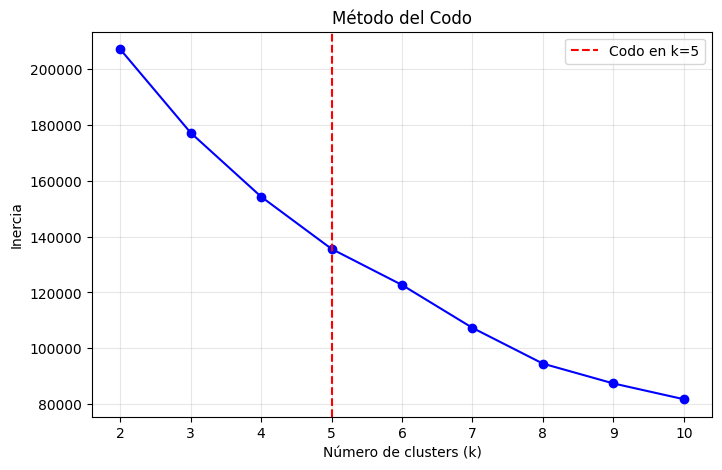

Número óptimo de clusters según el codo: 5


In [10]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    inertias.append(km.inertia_)

kn = KneeLocator(list(K_range), inertias, curve='convex', direction='decreasing')

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.axvline(x=kn.knee, color='r', linestyle='--', label=f'Codo en k={kn.knee}')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Número óptimo de clusters según el codo: {kn.knee}")

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_cluster['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

print("Distribución de clusters K-Means:")
print(df_cluster['kmeans_cluster'].value_counts().sort_index())

Distribución de clusters K-Means:
kmeans_cluster
0     690
1    9169
2    9638
3     279
4     105
Name: count, dtype: int64


In [12]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df_cluster['hier_cluster'] = hierarchical.fit_predict(df_scaled)

print("Distribución de clusters Jerárquico:")
print(df_cluster['hier_cluster'].value_counts().sort_index())

Distribución de clusters Jerárquico:
hier_cluster
0    9208
1     347
2    1854
3    8356
4     116
Name: count, dtype: int64


In [13]:
sil_kmeans = silhouette_score(df_scaled, df_cluster['kmeans_cluster'])
sil_hier = silhouette_score(df_scaled, df_cluster['hier_cluster'])

print(f"Silueta K-Means:    {sil_kmeans:.4f}")
print(f"Silueta Jerárquico: {sil_hier:.4f}")
print(f"\nMejor algoritmo: {'K-Means' if sil_kmeans > sil_hier else 'Jerárquico'}")

Silueta K-Means:    0.3778
Silueta Jerárquico: 0.3490

Mejor algoritmo: K-Means


In [14]:
cluster_summary = df_cluster.drop(columns=['hier_cluster']).groupby('kmeans_cluster').agg(['mean', 'median', 'count']).round(2)
cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns]
cluster_summary.T

kmeans_cluster,0,1,2,3,4
budget_mean,1.166048e+08,15768.38,11030976.28,265037.19,1636466.67
budget_median,1.100000e+08,0.00,0.00,0.00,0.00
budget_count,6.900000e+02,9169.00,9638.00,279.00,105.00
revenue_mean,4.693797e+08,21729.28,25668891.14,2546578.20,2814140.30
revenue_median,3.705555e+08,0.00,0.00,0.00,0.00
revenue_count,6.900000e+02,9169.00,9638.00,279.00,105.00
runtime_mean,1.212700e+02,26.20,99.66,85.27,56.15
runtime_median,1.190000e+02,9.00,99.00,90.00,70.00
runtime_count,6.900000e+02,9169.00,9638.00,279.00,105.00
popularity_mean,2.018000e+02,0.90,36.98,47.45,44.97


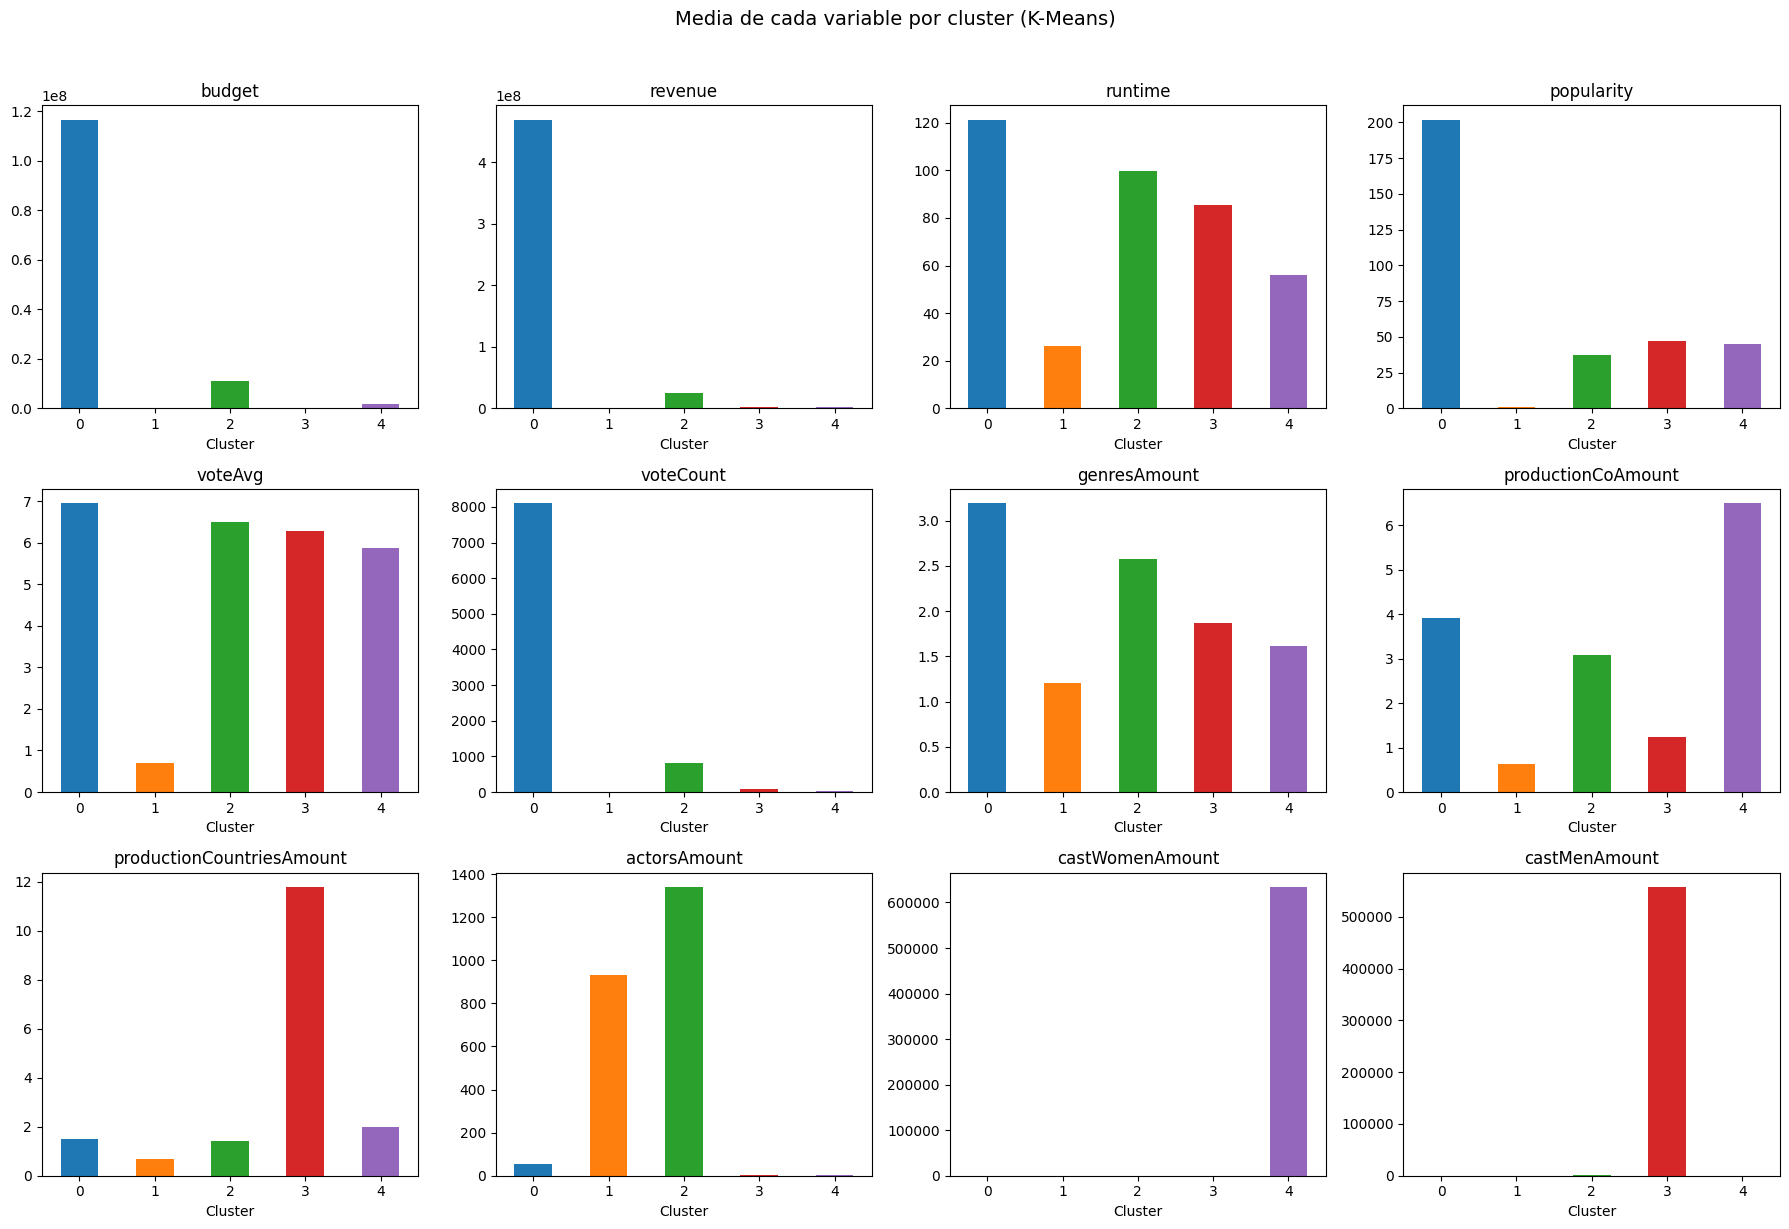

In [15]:
cluster_means = df_cluster.drop(columns=['hier_cluster']).groupby('kmeans_cluster').mean()

fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_vars[:12]):
    cluster_means[col].plot(kind='bar', ax=axes[i], color=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd'])
    axes[i].set_title(col)
    axes[i].set_xlabel('Cluster')
    axes[i].tick_params(axis='x', rotation=0)

plt.suptitle('Media de cada variable por cluster (K-Means)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [16]:
print("castWomenAmount - valores extremos:")
print(df_cluster['castWomenAmount'].describe())
print(f"\nValores > 1000: {(df_cluster['castWomenAmount'] > 1000).sum()}")

print("\ncastMenAmount - valores extremos:")
print(df_cluster['castMenAmount'].describe())
print(f"\nValores > 1000: {(df_cluster['castMenAmount'] > 1000).sum()}")

castWomenAmount - valores extremos:
count     19881.000000
mean       3510.315276
std       47726.821258
min           0.000000
25%           0.000000
50%           2.000000
75%           6.000000
max      922162.000000
Name: castWomenAmount, dtype: float64

Valores > 1000: 125

castMenAmount - valores extremos:
count     19881.000000
mean       8158.163422
std       70974.415894
min           0.000000
25%           0.000000
50%           3.000000
75%          11.000000
max      922017.000000
Name: castMenAmount, dtype: float64

Valores > 1000: 359


In [17]:
numeric_vars = ['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 
                'voteCount', 'genresAmount', 'productionCoAmount', 
                'productionCountriesAmount', 'actorsAmount', 'releaseYear']

df_cluster = df_cluster[numeric_vars].copy()

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_cluster['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df_cluster['hier_cluster'] = hierarchical.fit_predict(df_scaled)

sil_kmeans = silhouette_score(df_scaled, df_cluster['kmeans_cluster'])
sil_hier = silhouette_score(df_scaled, df_cluster['hier_cluster'])

print(f"Silueta K-Means:    {sil_kmeans:.4f}")
print(f"Silueta Jerárquico: {sil_hier:.4f}")
print(f"\nDistribución K-Means:")
print(df_cluster['kmeans_cluster'].value_counts().sort_index())
print(f"\nDistribución Jerárquico:")
print(df_cluster['hier_cluster'].value_counts().sort_index())

Silueta K-Means:    0.3711
Silueta Jerárquico: 0.3467

Distribución K-Means:
kmeans_cluster
0    9926
1     720
2    9195
3      32
4       8
Name: count, dtype: int64

Distribución Jerárquico:
hier_cluster
0    1709
1    8361
2    9769
3      35
4       7
Name: count, dtype: int64


In [18]:
cluster_means = df_cluster.drop(columns=['hier_cluster']).groupby('kmeans_cluster').mean().round(2)
print(cluster_means.to_string())

                      budget       revenue  runtime  popularity  voteAvg  voteCount  genresAmount  productionCoAmount  productionCountriesAmount  actorsAmount  releaseYear
kmeans_cluster                                                                                                                                                             
0               1.047629e+07  2.429118e+07    99.08       37.20     6.49     770.73          2.55                3.07                       1.72         80.38      2009.72
1               1.141667e+08  4.560095e+08   120.88      124.83     6.94    8006.28          3.17                3.93                       1.48         56.00      2009.13
2               9.960070e+03  2.280930e+03    26.20        1.15     0.72       0.62          1.20                0.64                       0.68         49.81      2025.11
3               1.406251e+06  5.570708e+06    55.88       26.60     6.17       5.25          2.66                0.69                       

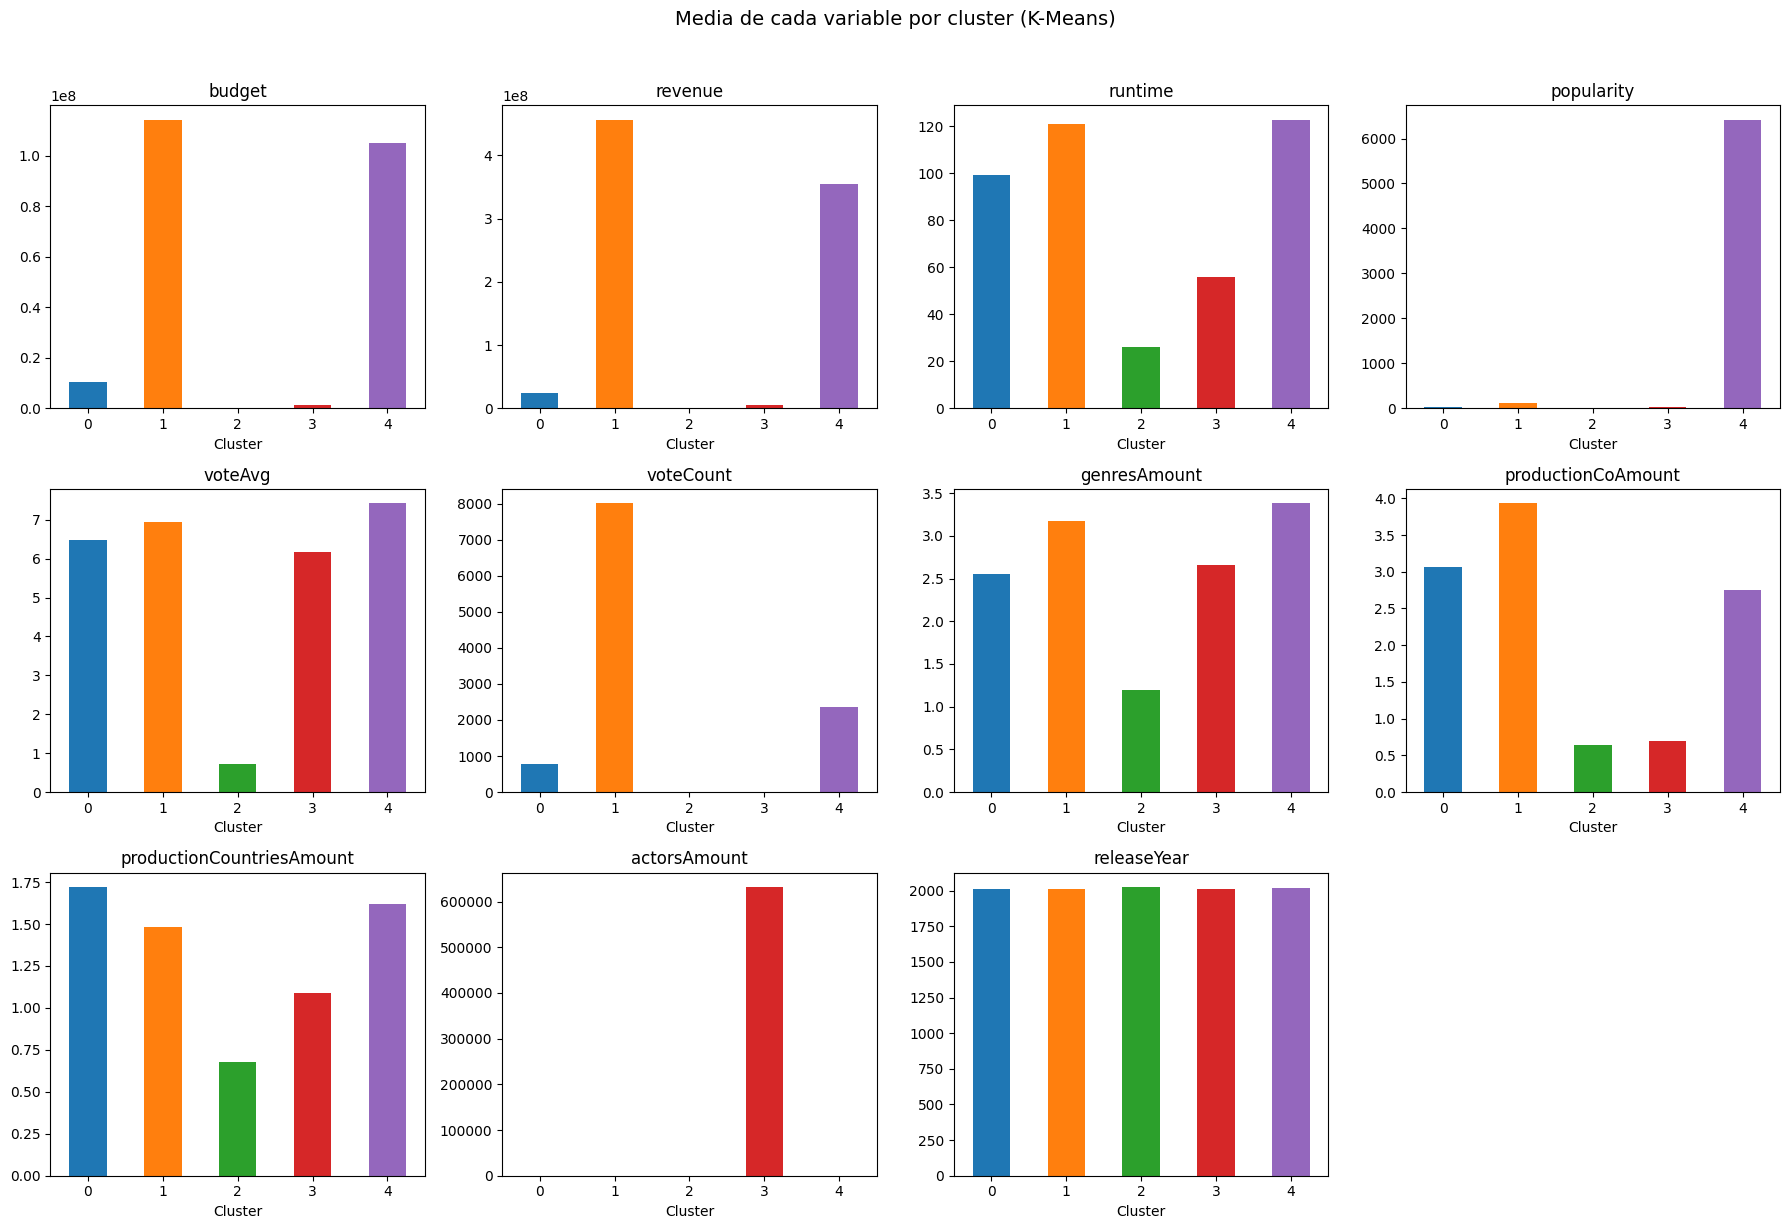

In [19]:
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_vars):
    cluster_means[col].plot(kind='bar', ax=axes[i], color=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd'])
    axes[i].set_title(col)
    axes[i].set_xlabel('Cluster')
    axes[i].tick_params(axis='x', rotation=0)

axes[11].axis('off')
plt.suptitle('Media de cada variable por cluster (K-Means)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [20]:
print(df_cluster['actorsAmount'].describe())
print(f"\nValores > 500: {(df_cluster['actorsAmount'] > 500).sum()}")

count     19881.000000
mean       1082.158242
std       26404.144588
min           0.000000
25%           3.000000
50%           9.000000
75%          21.000000
max      919590.000000
Name: actorsAmount, dtype: float64

Valores > 500: 37


In [21]:
numeric_vars = ['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 
                'voteCount', 'genresAmount', 'productionCoAmount', 
                'productionCountriesAmount', 'releaseYear']

df_cluster = df_cluster[numeric_vars].copy()

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_cluster['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df_cluster['hier_cluster'] = hierarchical.fit_predict(df_scaled)

sil_kmeans = silhouette_score(df_scaled, df_cluster['kmeans_cluster'])
sil_hier = silhouette_score(df_scaled, df_cluster['hier_cluster'])

print(f"Silueta K-Means:    {sil_kmeans:.4f}")
print(f"Silueta Jerárquico: {sil_hier:.4f}")
print(f"\nDistribución K-Means:")
print(df_cluster['kmeans_cluster'].value_counts().sort_index())

cluster_means = df_cluster.drop(columns=['hier_cluster']).groupby('kmeans_cluster').mean().round(2)
print(f"\n{cluster_means.to_string()}")

Silueta K-Means:    0.3367
Silueta Jerárquico: 0.3629

Distribución K-Means:
kmeans_cluster
0    7351
1    8512
2    3518
3     492
4       8
Name: count, dtype: int64

                      budget       revenue  runtime  popularity  voteAvg  voteCount  genresAmount  productionCoAmount  productionCountriesAmount  releaseYear
kmeans_cluster                                                                                                                                               
0               2.643955e+06  4.833415e+06    88.45       35.91     6.43     308.87          2.32                2.48                       1.73      2016.64
1               1.061064e+04  2.234424e+04    25.27        0.59     0.24       0.16          1.17                0.61                       0.66      2025.18
2               2.891270e+07  7.455610e+07   110.14       36.33     6.67    1860.84          2.89                3.96                       1.52      1997.89
3               1.322832e+08  5.520962e+0

In [22]:
cluster_means_hier = df_cluster.drop(columns=['kmeans_cluster']).groupby('hier_cluster').mean().round(2)
print("Distribución Jerárquico:")
print(df_cluster['hier_cluster'].value_counts().sort_index())
print(f"\n{cluster_means_hier.to_string()}")

Distribución Jerárquico:
hier_cluster
0    10386
1     8368
2      945
3        7
4      175
Name: count, dtype: int64

                   budget       revenue  runtime  popularity  voteAvg  voteCount  genresAmount  productionCoAmount  productionCountriesAmount  releaseYear
hier_cluster                                                                                                                                              
0              9815628.51  2.061392e+07    91.22       33.26     6.59     614.96          2.45                2.86                       1.36      2010.89
1                10079.20  1.926340e+03    28.41        0.29     0.01       0.02          1.21                0.66                       0.69      2025.25
2             89256679.12  3.755591e+08   118.96      125.76     7.01    7423.46          2.96                3.91                       1.54      2008.03
3             92857142.86  3.836708e+08   119.14     6786.68     7.50    2334.71          3.29           

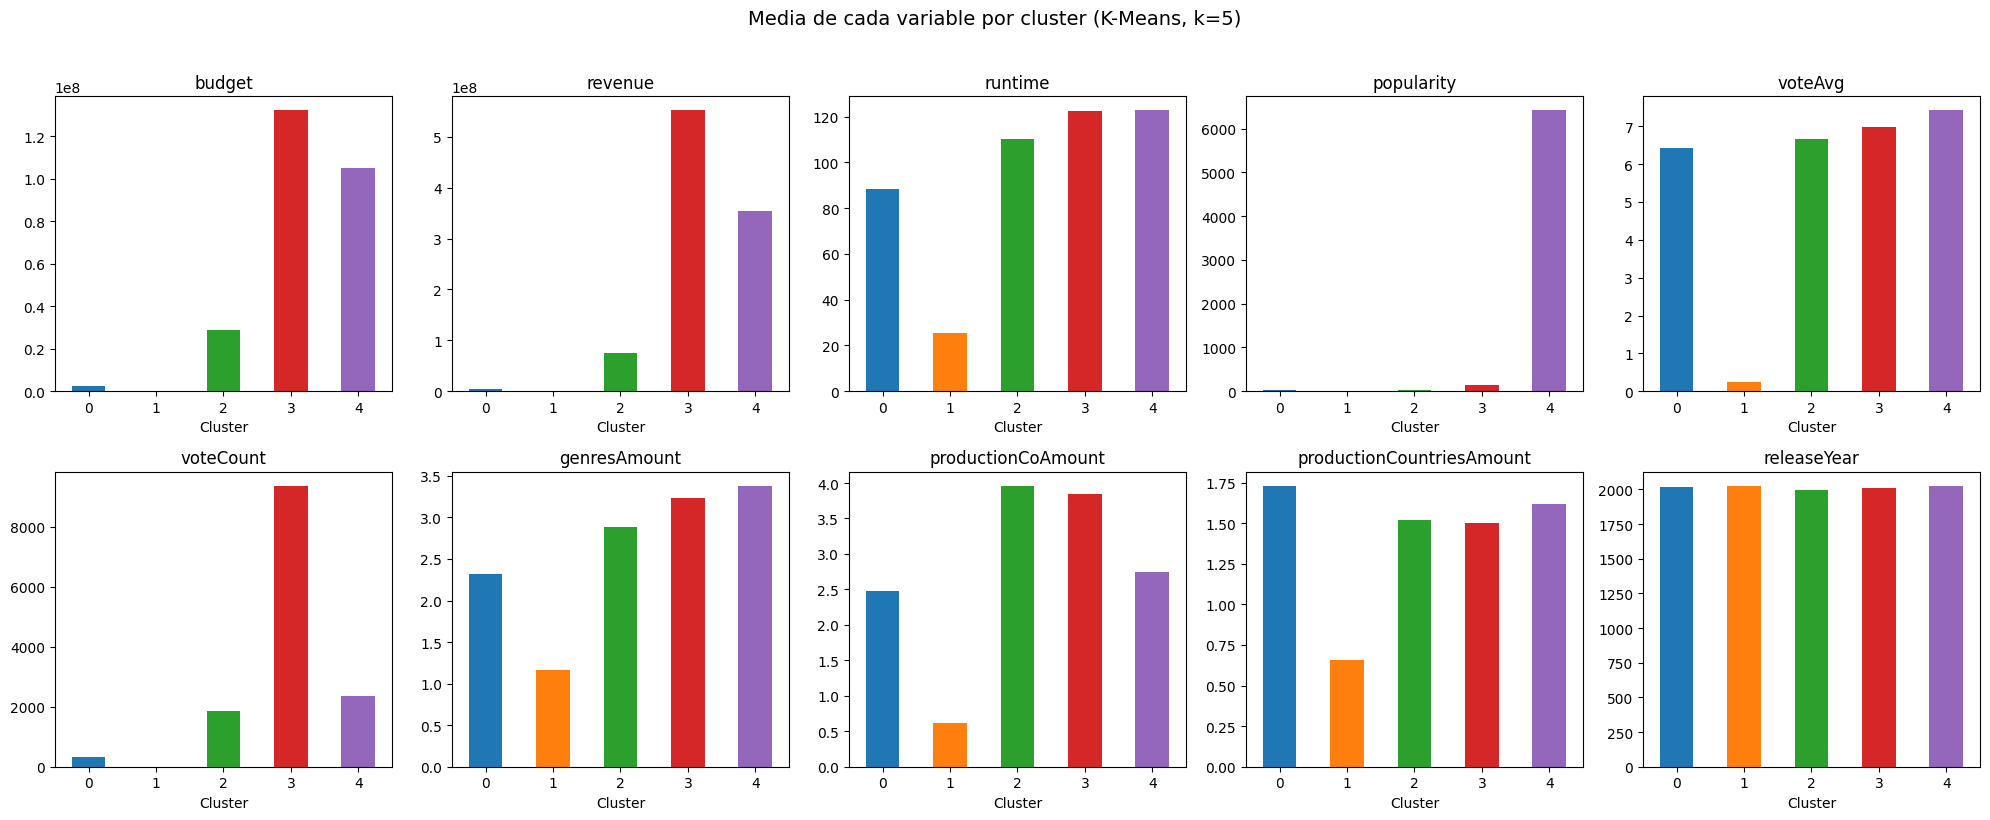

In [23]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_vars):
    cluster_means[col].plot(kind='bar', ax=axes[i], color=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd'])
    axes[i].set_title(col)
    axes[i].set_xlabel('Cluster')
    axes[i].tick_params(axis='x', rotation=0)

plt.suptitle('Media de cada variable por cluster (K-Means, k=5)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

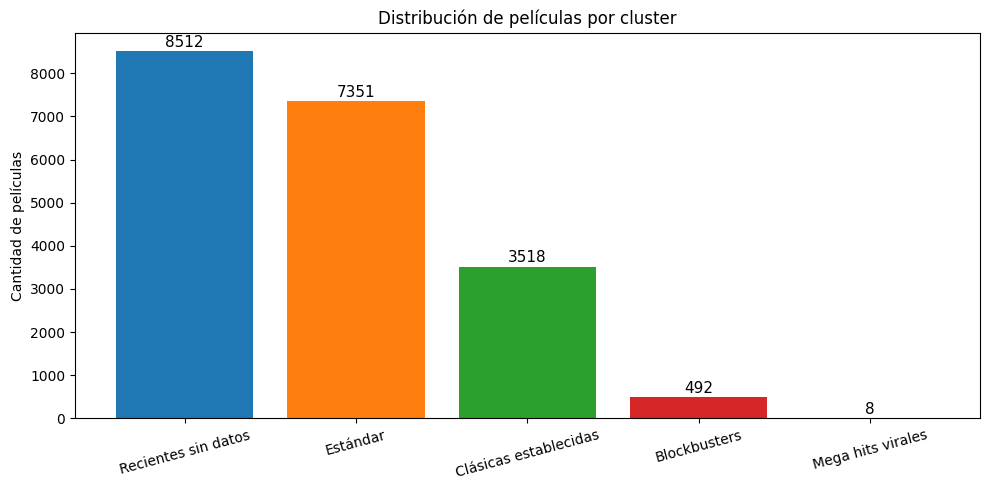

In [24]:
cluster_names = {
    0: 'Estándar',
    1: 'Recientes sin datos',
    2: 'Clásicas establecidas',
    3: 'Blockbusters',
    4: 'Mega hits virales'
}

df_cluster['cluster_name'] = df_cluster['kmeans_cluster'].map(cluster_names)

colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd']
counts = df_cluster['cluster_name'].value_counts()

plt.figure(figsize=(10, 5))
bars = plt.bar(counts.index, counts.values, color=colors)
for bar, val in zip(bars, counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, str(val), ha='center', fontsize=11)
plt.title('Distribución de películas por cluster')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

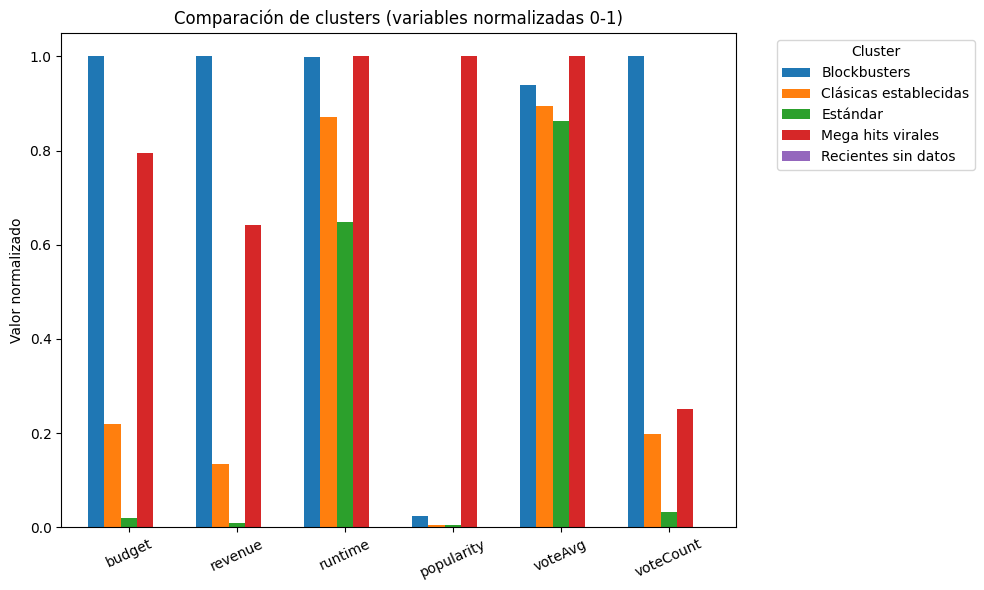

In [25]:
from sklearn.preprocessing import MinMaxScaler

radar_vars = ['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 'voteCount']
cluster_means_radar = df_cluster.groupby('cluster_name')[radar_vars].mean()

scaler_radar = MinMaxScaler()
radar_scaled = pd.DataFrame(scaler_radar.fit_transform(cluster_means_radar), 
                            columns=radar_vars, index=cluster_means_radar.index)

fig, ax = plt.subplots(figsize=(10, 6))
radar_scaled.T.plot(kind='bar', ax=ax, color=colors, width=0.75)
ax.set_title('Comparación de clusters (variables normalizadas 0-1)')
ax.set_ylabel('Valor normalizado')
ax.legend(title='Cluster', bbox_to_anchor=(1.05, 1))
ax.tick_params(axis='x', rotation=25)
plt.tight_layout()
plt.show()

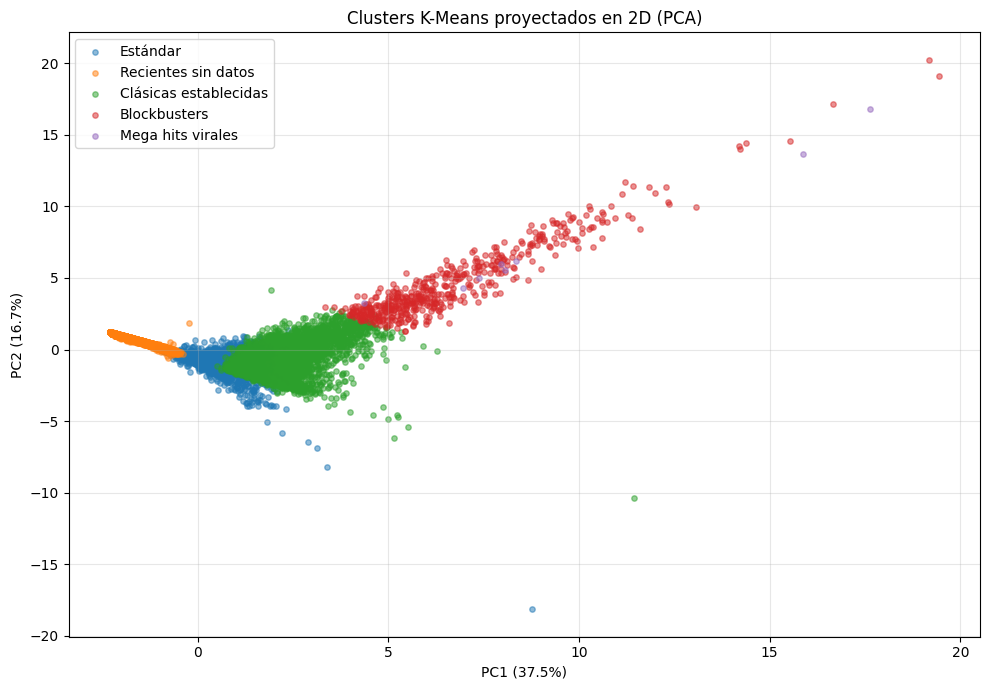

In [26]:
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)

cluster_names = {
    0: 'Estándar',
    1: 'Recientes sin datos',
    2: 'Clásicas establecidas',
    3: 'Blockbusters',
    4: 'Mega hits virales'
}
df_cluster['cluster_name'] = df_cluster['kmeans_cluster'].map(cluster_names)

colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd']

plt.figure(figsize=(10, 7))
for i, name in enumerate(cluster_names.values()):
    mask = df_cluster['cluster_name'] == name
    plt.scatter(df_pca_2d[mask, 0], df_pca_2d[mask, 1], 
                c=colors[i], label=name, alpha=0.5, s=15)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Clusters K-Means proyectados en 2D (PCA)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()